# ***6 a***

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftfreq, ifft, ifft2
from numpy.fft import ifftshift

In [2]:
img = plt.imread("5.jpg")


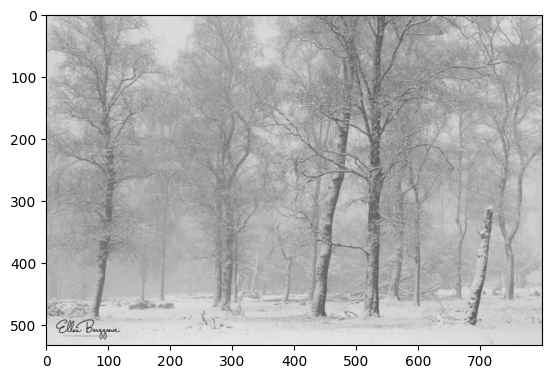

In [3]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='gray')
m, n = grey.shape


In [4]:
f = np.fft.fft2(grey)

**Ideal** **LPF**

In [5]:

d0 = 30
u = np.arange(m); u[u > m/2] -= m
v = np.arange(n); v[v > n/2] -= n
V, U = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)
h = (D <= d0).astype(float)

g = h * f

In [6]:
out = np.fft.ifft2(g)
out = np.abs(out)

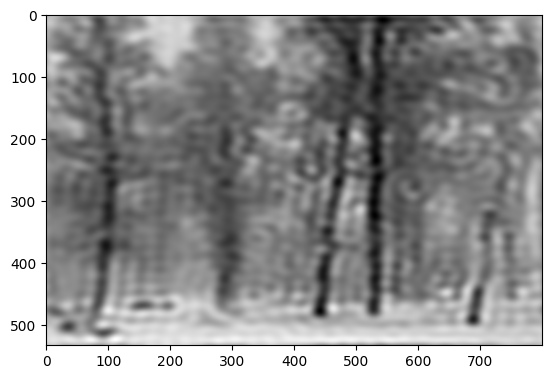

In [7]:
plt.plot()
plt.imshow(out, cmap='gray')
plt.show()

**Butterworth LPF**

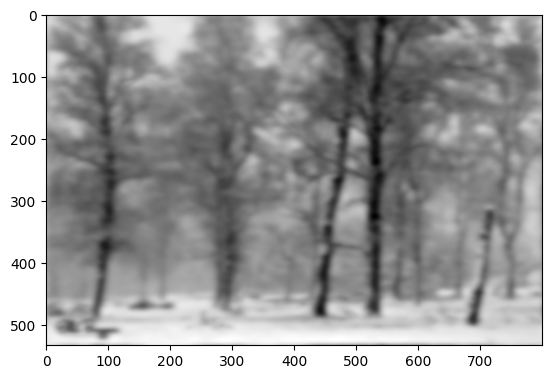

In [8]:
f = np.fft.fft2(grey)
d0 = 30
n_order = 2
u = np.arange(m); u[u > m/2] -= m
v = np.arange(n); v[v > n/2] -= n
V, U = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)
h = 1 / (1 + (D/d0)**(2*n_order))
g = h * f
out = np.fft.ifft2(g)
out = np.abs(out)

plt.plot()
plt.imshow(out, cmap='gray')
plt.show()

**Guassian LPF**


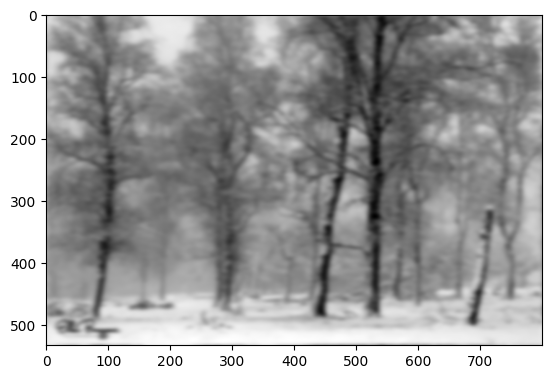

In [9]:
f = np.fft.fft2(grey)
d0 = 30
u = np.arange(m); u[u > m/2] -= m
v = np.arange(n); v[v > n/2] -= n
V, U = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)
h = np.exp(-(D**2) / (2*(d0**2)))
g = h * f
out = np.fft.ifft2(g)
out = np.abs(out)

plt.plot()
plt.imshow(out, cmap='gray')
plt.show()

# ***6 b***

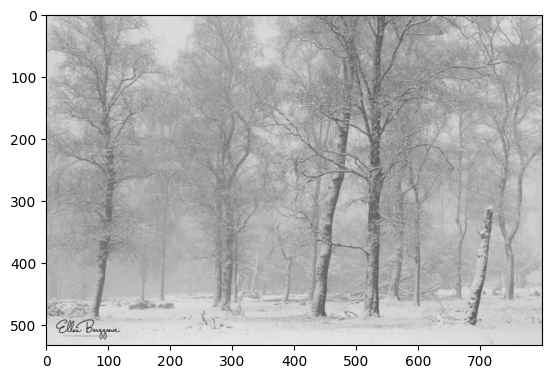

In [10]:
img = plt.imread("5.jpg")
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='gray')
m, n = grey.shape


In [11]:
f = np.fft.fft2(grey)
d0 = 0
u = np.arange(m); u[u > m/2] -= m
v = np.arange(n); v[v > n/2] -= n
V, U = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)

**Ideal HPF**

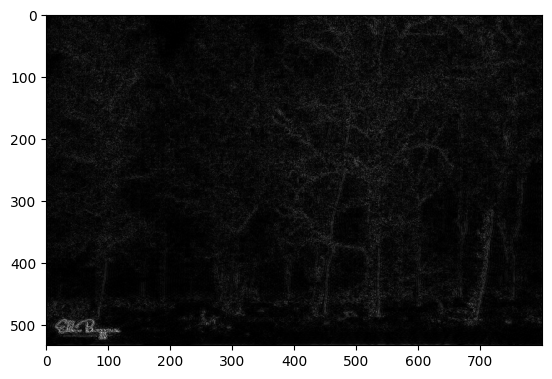

In [12]:

d0 = 100
h = (D > d0).astype(float)
out = np.abs(np.fft.ifft2(f * h))

plt.imshow(out, cmap='gray')
plt.show()

/tmp/ipython-input-4288066720.py:3: RuntimeWarning: divide by zero encountered in divide
  h = 1 / (1 + (d0/D)**(2*n_order))


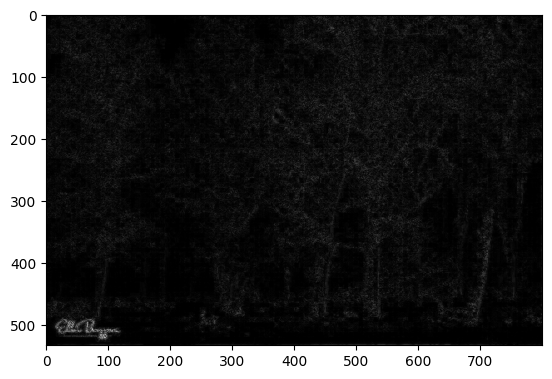

In [13]:
d0 = 150
n_order = 5
h = 1 / (1 + (d0/D)**(2*n_order))
h[D==0] = 0
out = np.abs(np.fft.ifft2(f * h))

plt.imshow(out, cmap='gray')
plt.show()


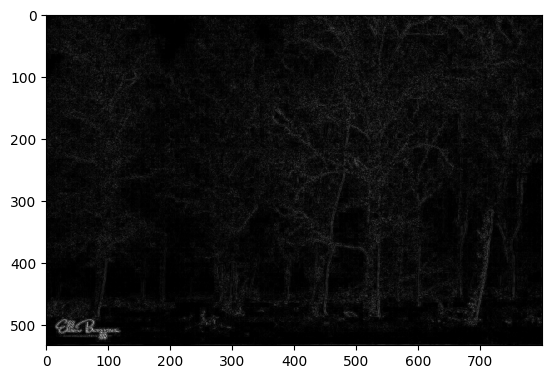

In [14]:
d0 = 100
h = 1 - np.exp(-(D**2)/(2*(d0**2)))
out = np.abs(np.fft.ifft2(f * h))

plt.imshow(out, cmap='gray')
plt.show()